In [1]:
from pickling import load_pickle, create_pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
import choplo_statistique as cstats
import choplo_visualization as cvis
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
a_df = load_pickle('amp')
a_side_df = load_pickle('side_amp')
a_jt_df = load_pickle('amp_jt')
a_angle_df=load_pickle('amp_angle')
a_jt_full_df = load_pickle('amp_not_norm_joint_df')
a_angle_full_df = load_pickle('amp_not_norm_angle_df')
a_st_df = load_pickle('amp_strat')
a_missing_df = load_pickle('missing_amp')
a_sum_strat_df = load_pickle('a_sum_strat_df')

v_df = load_pickle('vit')
v_side_df = load_pickle('side_vit')
v_jt_df = load_pickle('vit_jt')
v_angle_df=load_pickle('vit_angle')
v_st_df = load_pickle('vit_strat')
v_jt_full_df = load_pickle('vit_not_norm_joint_df')
v_angle_full_df = load_pickle('vit_not_norm_angle_df')
v_missing_df = load_pickle('missing_vit') 
v_sum_strat_df = load_pickle('v_sum_strat_df')

#NEW FILT OVERWRITE
a_df = load_pickle('amp')
a_side_df = load_pickle('side_amp')
a_jt_df = load_pickle('amp_jt_new_filt')
a_jt_full_df = load_pickle('amp_not_norm_joint_df_new_filt')
a_angle_full_df = load_pickle('amp_not_norm_angle_df_new_filt')
a_st_df = load_pickle('amp_strat_new_filt')
a_missing_df = load_pickle('missing_amp')

v_df = load_pickle('vit')
v_side_df = load_pickle('side_vit')
v_jt_df = load_pickle('vit_jt_new_filt')
v_st_df = load_pickle('vit_strat_new_filt')
v_jt_full_df = load_pickle('vit_not_norm_joint_df_new_filt')
v_angle_full_df = load_pickle('vit_not_norm_angle_df_new_filt')
v_missing_df = load_pickle('missing_vit') 

idx = pd.IndexSlice

C:\Users\tousi\AppData\Local\conda\conda\envs\python37\lib\site-packages\pandas\core\indexes\base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


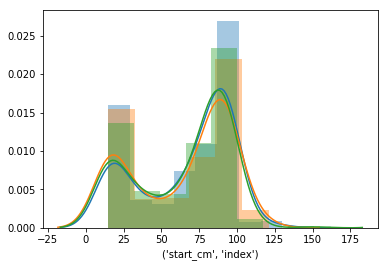

In [15]:
sns.distplot(v_df.loc[idx['lvl_0',:,:],('start_cm','index')].dropna())
sns.distplot(v_df.loc[idx['lvl_1',:,:],('start_cm','index')].dropna())
sns.distplot(v_df.loc[idx['lvl_2',:,:],('start_cm','index')].dropna())

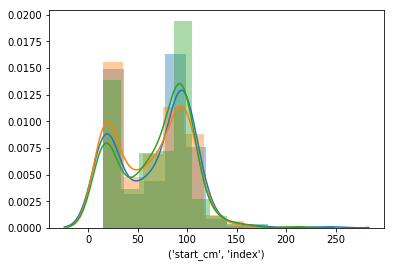

In [16]:
sns.distplot(a_df.loc[idx['lvl_0',:,:],('start_cm','index')].dropna())
sns.distplot(a_df.loc[idx['lvl_1',:,:],('start_cm','index')].dropna())
sns.distplot(a_df.loc[idx['lvl_2',:,:],('start_cm','index')].dropna())

In [34]:
def plot_jt_angl_strat(jt_df, angle_df, st_df, save=True, name = 'jt_angl_strat'):
    import matplotlib
    from matplotlib.ticker import FormatStrFormatter

    font = {'family' : 'normal',
            'weight': 'normal',
        'size'   : 12}

    matplotlib.rc('font', **font)

    fig, axes = plt.subplots(nrows=3, ncols=3, sharex='col', sharey='row', constrained_layout=True)
    ax1 = axes[0]
    ax2 = axes[1]  
    ax3 = axes[2]

    plot_lvl_strat_jt(jt_df, angle_df, st_df, 0, 'cubehelix', ax1 = axes[0][0], ax2=axes[1][0], ax3=axes[2][0], add_cbar=False)
    plot_lvl_strat_jt(jt_df, angle_df, st_df, 1, 'cubehelix',ax1 = axes[0][1], ax2=axes[1][1], ax3=axes[2][1], add_cbar=False)
    plot_lvl_strat_jt(jt_df, angle_df, st_df, 2, 'cubehelix', ax1 = axes[0][2], ax2=axes[1][2], ax3=axes[2][2])
    for axi in axes.flat:
        axi.xaxis.set_major_locator(plt.MaxNLocator(5))
        axi.xaxis.set_ticklabels(['0', ' ', ' ', ' ', '100'])

    for ax in axes.flat:
        ax.label_outer()

    #devide groups
    for ax in ax3:
        ax.hlines([1,2,3,4], *ax.get_xlim())
        
    
    for ax in ax1[1:3]:
        ax.legend_.remove()
    for ax in ax2[1:3]:
        ax.legend_.remove()
        


    ax1[0].set_ylabel('Displacement (m)', fontsize=14)
    ax2[0].set_ylabel('Angle (degrés)', fontsize=14)
    ax3[0].set_ylabel('Stratégie', fontsize=14)
    ax3[1].set_xlabel('Temps normalisé du tML (%)', fontsize=14)

    ax1[0].title.set_text("Niveau 1")
    ax1[1].title.set_text("Niveau 2")
    ax1[2].title.set_text("Niveau 3")
    plt.suptitle('Condition {}'.format(name), fontsize=20)

    fig.set_size_inches(18, 8)
    if save:
        plt.savefig('{}_jt_angl_strat.png'.format(name), dpi=1000)
    plt.show()

def plot_lvl_strat_jt(df_jt, df_angle, df_strat, lvl, cm, ax1=None, ax2=None, ax3=None, fig_size=(18, 6.5), add_cbar=True):

    jt = cstats.get_mean_lvl_jt(df_jt, lvl)
    angle=cstats.get_mean_lvl_jt(df_angle, lvl)
    strat = cstats.get_mean_lvl_strat(df_strat, lvl)
    
    c7_mean, c7_std = jt.groupby(level=1).mean().loc['c7'], jt.groupby(level=1).std().loc['c7']
    pel_mean, pel_std = jt.groupby(level=1).mean().loc['pelvis'], jt.groupby(level=1).std().loc['pelvis']
    cof_mean, cof_std = jt.groupby(level=1).mean().loc['cof'], jt.groupby(level=1).std().loc['cof']
    
    teta1_mean, teta1_std = angle.groupby(level=1).mean().loc['teta1'], angle.groupby(level=1).std().loc['teta1']
    teta2_mean, teta2_std = angle.groupby(level=1).mean().loc['teta2'], angle.groupby(level=1).std().loc['teta2']
    teta2_v_mean, teta2_v_std = angle.groupby(level=1).mean().loc['teta2_v'], angle.groupby(level=1).std().loc['teta2_v']
    time = np.arange(404)
    idx = pd.IndexSlice
    
    if ax1 is None or ax2 is None or ax3 is None:
        fig, axe = plt.subplots(ncols=1, nrows=3, sharex=True, constrained_layout=True)
        ax1, ax2, ax3= axe[0], axe[1], axe[2]
    for axi in [ax1,ax2, ax3]:
        axi.xaxis.set_major_locator(plt.MaxNLocator(5))
        axi.set_xticks([0,25,50,75,100])

    
    ax1.plot(time,c7_mean,color = 'r', label = 'MSk')
    ax1.fill_between(time, c7_mean + c7_std, c7_mean - c7_std, facecolor='red', alpha=0.3)
    ax1.plot(time,pel_mean,color = 'b', label = 'BSk')
    ax1.fill_between(time, pel_mean + pel_std, pel_mean - pel_std, facecolor='blue', alpha=0.3)
    ax1.plot(time,cof_mean,color = 'k', label = 'CdP')
    ax1.fill_between(time, cof_mean + cof_std, cof_mean - cof_std, facecolor='black', alpha=0.3)
    
    ax2.plot(time,teta1_mean,color = 'b', label = 'teta 1')
    ax2.fill_between(time, teta1_mean + teta1_std, teta1_mean - teta1_std, facecolor='blue', alpha=0.3)
    ax2.plot(time,teta2_mean,color = 'r', label = 'teta 2')
    ax2.fill_between(time, teta2_mean + teta2_std, teta2_mean - teta2_std, facecolor='red', alpha=0.3)
    ax2.plot(time,teta2_v_mean,color = 'g', label = 'teta 2 vertical')
    ax2.fill_between(time, teta2_v_mean + teta2_v_std, teta2_v_mean - teta2_v_std, facecolor='green', alpha=0.1)
    ax2.legend(loc='upper left')
    ax1.legend(loc='upper left')
    sns.heatmap(strat.groupby(level=1).mean(),ax=ax3, vmin=0, vmax=1, cmap=cm, cbar=add_cbar)


(404, 2700)
(404, 2700)
(404, 2700)
(404, 2700)
(404, 2700)
(404, 2700)


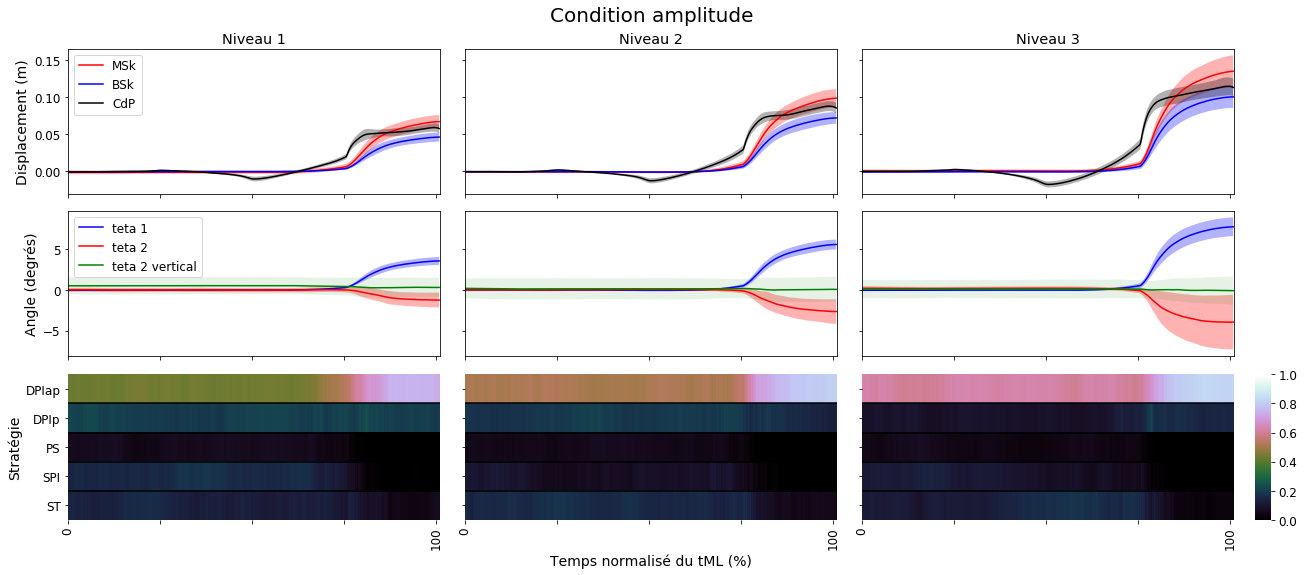

(404, 2700)
(404, 2700)
(404, 2700)
(404, 2700)
(404, 2700)
(404, 2700)


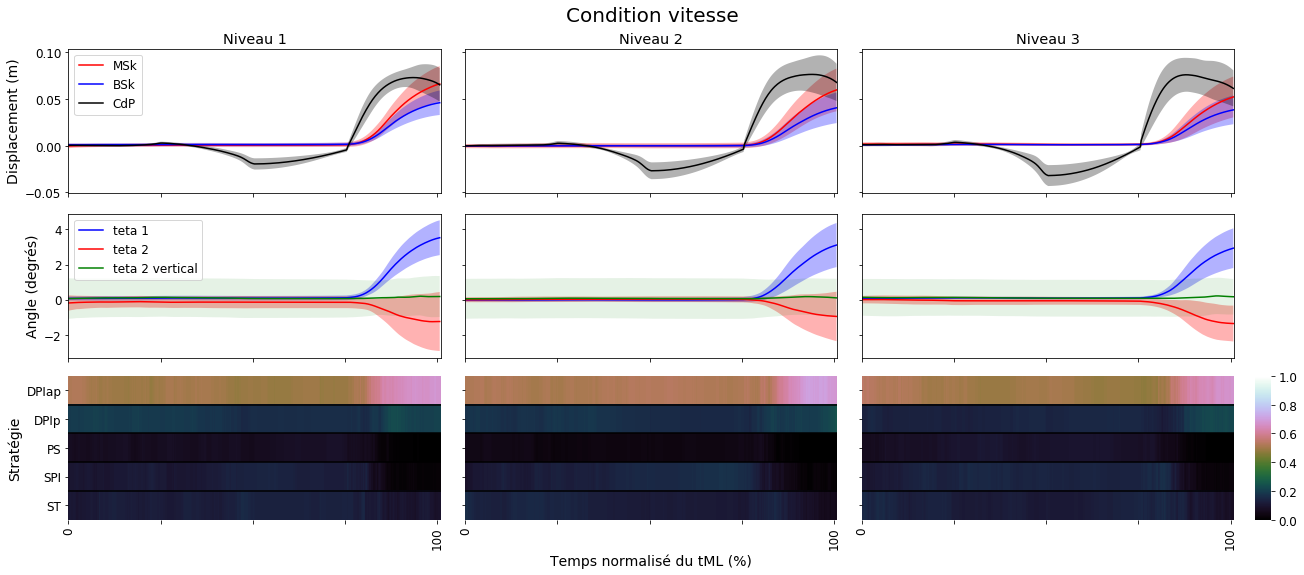

In [35]:


plot_jt_angl_strat(a_jt_df, a_angle_df, a_st_df, name='amplitude', save=True)
plot_jt_angl_strat(v_jt_df, v_angle_df, v_st_df, name='vitesse', save=True)


In [155]:
g1_strat= a_st_df.transpose().loc[idx[:,'player_3':'player_7',:],:].transpose()
g1_angle= a_angle_df.transpose().loc[idx[:,'player_3':'player_7',:],:].transpose()
g1_jt  = a_jt_df.transpose().loc[idx[:,'player_3':'player_7',:],:].transpose()

g2_strat=pd.concat([a_st_df.transpose().loc[idx[:,:'player_2',:],:].transpose(), a_st_df.transpose().loc[idx[:,'player_8':,:],:].transpose()], axis=1)
g2_angle= pd.concat([a_angle_df.transpose().loc[idx[:, :'player_2',:],:].transpose(), a_angle_df.transpose().loc[idx[:,'player_8':,:],:].transpose()], axis=1)
g2_jt = pd.concat([a_jt_df.transpose().loc[idx[:, :'player_2',:],:].transpose(), a_jt_df.transpose().loc[idx[:,'player_8':,:],:].transpose()], axis=1, )

(404, 1350)
(404, 1350)
(404, 1350)
(404, 1350)
(404, 1350)
(404, 1350)


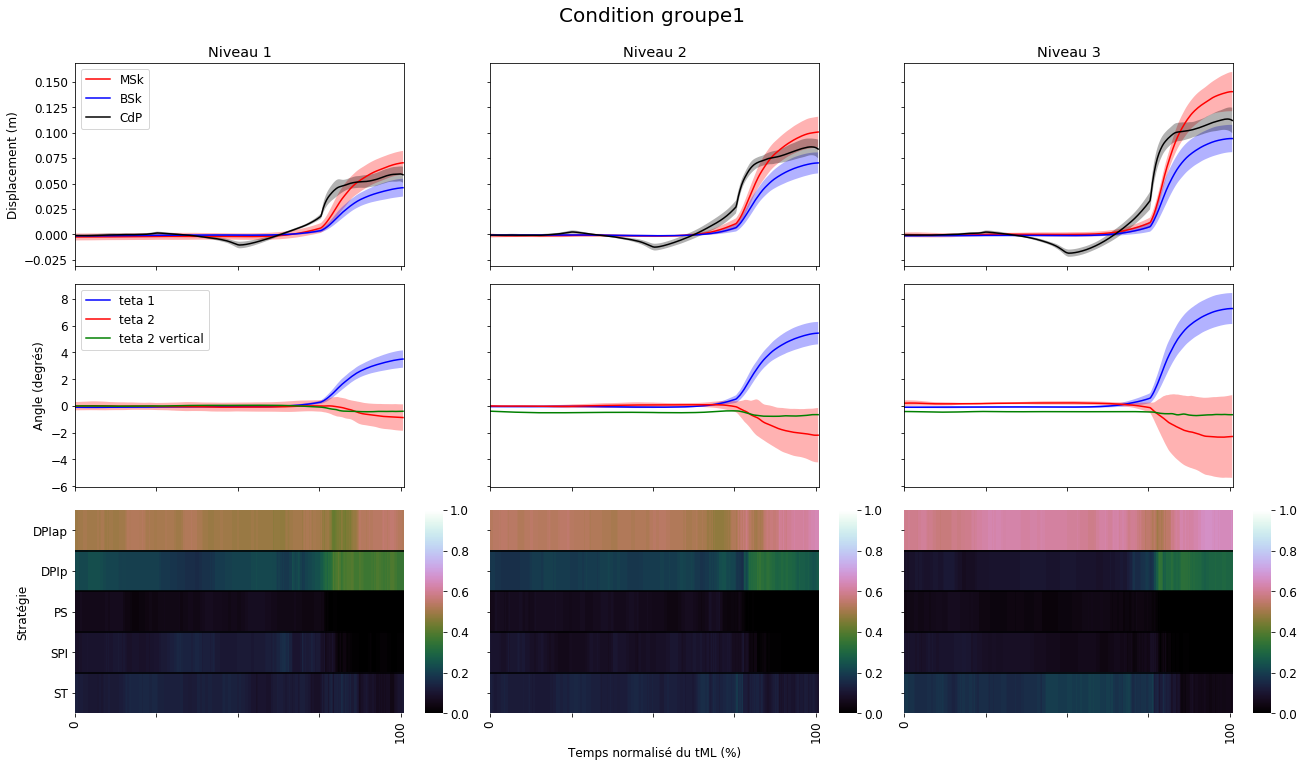

(404, 1350)
(404, 1350)


C:\Users\tousi\Documents\Labo_Laurent_Ballaz\Projet_Maîtrise\code\analyse_adulte\choplo_statistique.py:117: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_jt = df.transpose().loc[idx[l, p]].groupby(level=1).mean()
C:\Users\tousi\Documents\Labo_Laurent_Ballaz\Projet_Maîtrise\code\analyse_adulte\choplo_statistique.py:105: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_st = df.transpose().loc[idx[l, p]].groupby(level=1).mean()


(404, 1350)
(404, 1350)
(404, 1350)
(404, 1350)


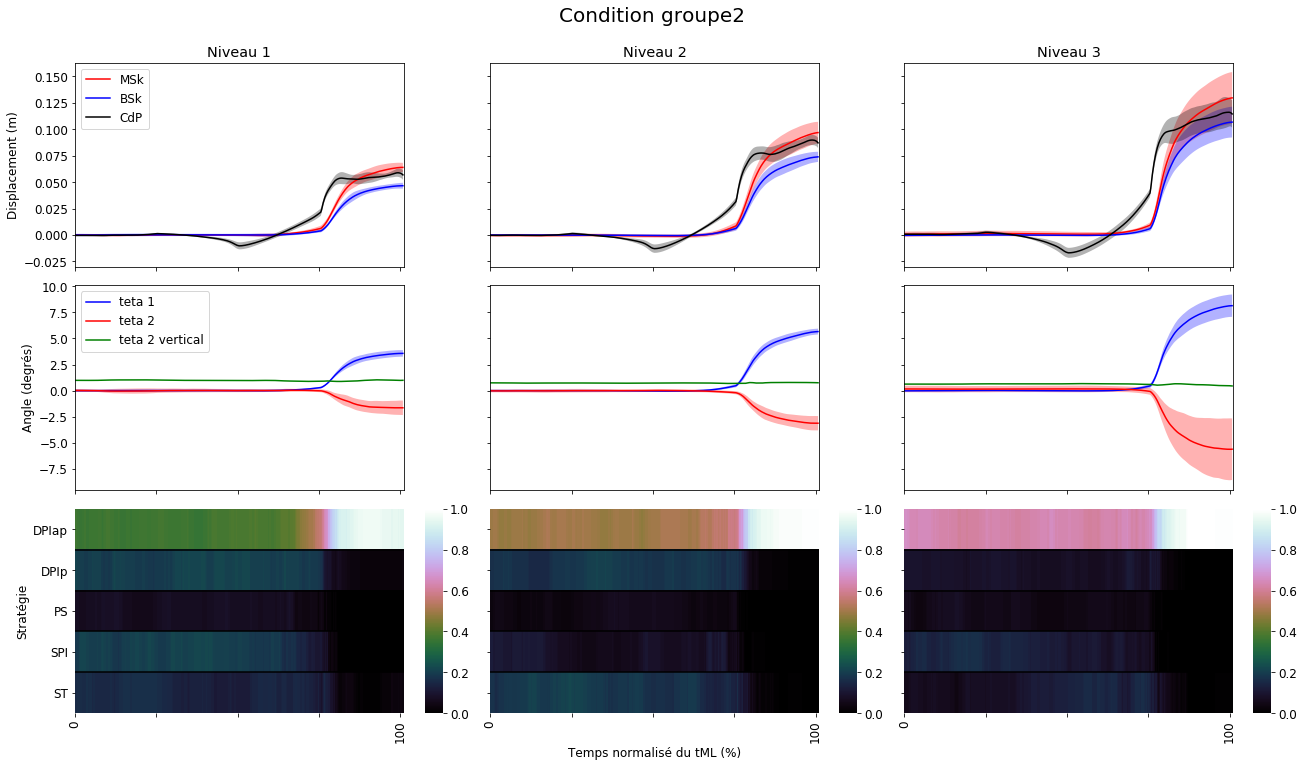

In [7]:
cvis.plot_jt_angl_strat(g1_jt, g1_angle, g1_strat, name='groupe1')
cvis.plot_jt_angl_strat(g2_jt, g2_angle, g2_strat, name='groupe2')


In [6]:
g1_strat= v_st_df.transpose().loc[idx[:,'player_3':'player_7',:],:].transpose()
g1_angle= v_angle_df.transpose().loc[idx[:,'player_3':'player_7',:],:].transpose()
g1_jt  = v_jt_df.transpose().loc[idx[:,'player_3':'player_7',:],:].transpose()

g2_strat=pd.concat([v_st_df.transpose().loc[idx[:,:'player_2',:],:].transpose(), v_st_df.transpose().loc[idx[:,'player_8':,:],:].transpose()], axis=1)
g2_angle= pd.concat([v_angle_df.transpose().loc[idx[:, :'player_2',:],:].transpose(), v_angle_df.transpose().loc[idx[:,'player_8':,:],:].transpose()], axis=1)
g2_jt = pd.concat([v_jt_df.transpose().loc[idx[:, :'player_2',:],:].transpose(), v_jt_df.transpose().loc[idx[:,'player_8':,:],:].transpose()], axis=1, )

(404, 1350)
(404, 1350)
(404, 1350)
(404, 1350)
(404, 1350)
(404, 1350)


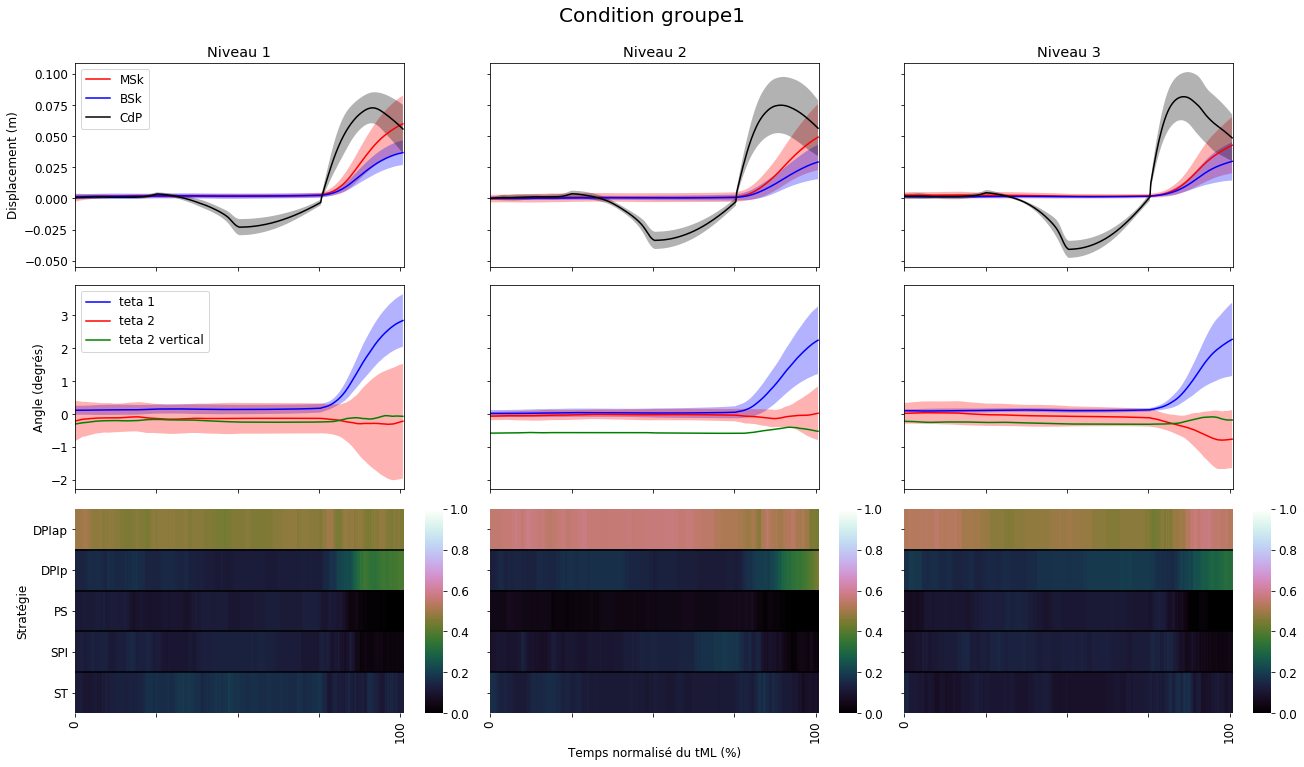

(404, 1350)
(404, 1350)
(404, 1350)
(404, 1350)
(404, 1350)
(404, 1350)


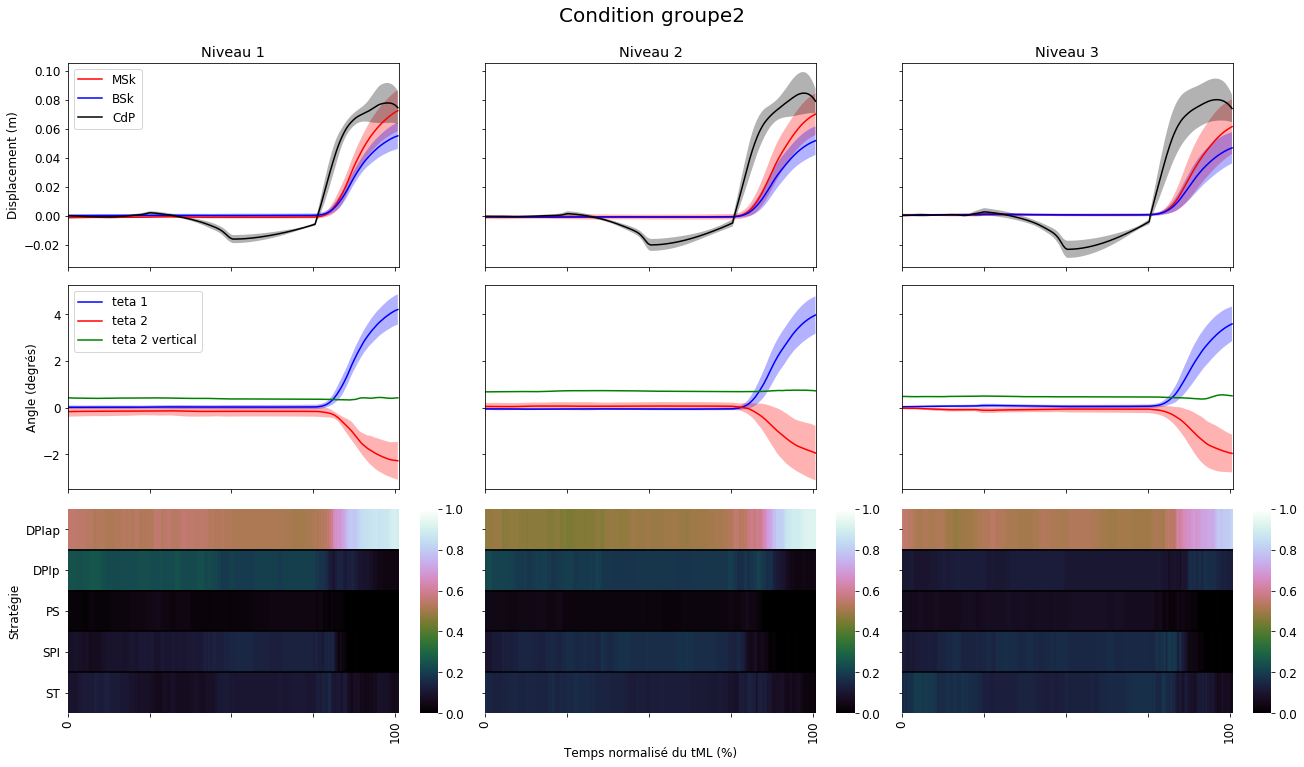

In [7]:
cvis.plot_jt_angl_strat(g1_jt, g1_angle, g1_strat, name='groupe1')
cvis.plot_jt_angl_strat(g2_jt, g2_angle, g2_strat, name='groupe2')


In [67]:
df = a_sum_strat_df
col0 = df.iloc[0].index.get_level_values(0).unique()
col1 = df.iloc[1].index.get_level_values(1).unique()
ind0 = df.index.get_level_values(0).unique()
ind1 = df.index.get_level_values(1).unique()
ind2 = df.index.get_level_values(2).unique()
columns =['level', 'phase', 'strat', 'sum','move', 'player']
index = np.arange(len(col0)*len(col1)*len(ind0)*len(ind1)*len(ind2))
new_df = pd.DataFrame(index=index, columns=columns)
i=0
for l in ind0: #lvl
    for p in ind1: #player
        for m in ind2: #move
            for ph in col0: #phase
                for s in col1: #strategy
                    new_df.iloc[i]['level'] = l
                    new_df.iloc[i]['player'] = p
                    new_df.iloc[i]['move'] = m
                    new_df.iloc[i]['phase'] = ph
                    new_df.iloc[i]['strat'] = s
                    new_df.iloc[i]['sum'] = df.loc[(l,p,m)][ph][s]
                    i+=1
                    

In [255]:
p1 = a_sum_strat_df['phase_1'].groupby(level=0).mean().reset_index()
p2 = a_sum_strat_df['phase_2']
p3 = a_sum_strat_df['phase_3']
p4 = a_sum_strat_df['phase_4']


In [4]:
data = pd.melt(p1, id_vars='index', value_vars=col1)


NameError: name 'p1' is not defined

In [338]:
def get_sum_strat_data_for_plot(sum_df, idx_phase):
    sum_df.columns.set_names(['phase', 'strat'], inplace=True)
    cols = sum_df.iloc[1].index.get_level_values(1).unique()
    data =sum_df.groupby(level=0).mean().reset_index()
    return data, pd.melt(data, id_vars='index', value_vars='phase')

In [339]:
def plot_bar_graph_phase(sum_df, phase):
    data = get_sum_strat_data_for_plot(sum_df, phase)
    g = sns.catplot(x='index', y='value', hue='strat', data=data, kind='bar' )
    return g, data

In [340]:
ax, data = plot_bar_graph_phase(v_sum_strat_df, 2)

AttributeError: 'tuple' object has no attribute 'get'

In [333]:
data, melt = get_sum_strat_data_for_plot(v_sum_strat_df,1)

In [205]:
def plot_bar(sum_df, name):
    import matplotlib
    from matplotlib.ticker import FormatStrFormatter

    font = {'family' : 'normal',
            'weight': 'normal',
        'size'   : 16}

    matplotlib.rc('font', **font)
    sum_df.columns.set_names(['phase', 'strat'], inplace=True)
    cols = sum_df.iloc[1].index.get_level_values(1).unique()
    data =sum_df.groupby(level=0).mean().reset_index()
    melt = pd.melt(data, id_vars='index')
    melt['index'].replace('lvl_0', 'level 1', inplace=True)
    melt['index'].replace('lvl_1', 'level 2', inplace=True)
    melt['index'].replace('lvl_2', 'level 3', inplace=True)

    fig = plt.figure()
    g = sns.catplot(x='strat', y='value', hue='index', col='phase', data=melt, kind='bar')
    
    plt.suptitle(name, y=1.05, fontsize=20)
    fig.set_size_inches(16, 10)
    i=1
    for ax in g.axes[0]:
        ax.set_xlabel('')
        ax.title.set_text('phase {}'.format(i))
        i+=1
        
    
    g.axes[0][0].set_ylabel("% d'importance moyenne")
    g.fig.text(0.5, 0.04, 'Stratégie', ha='center', va='center')
    plt.savefig('phase_strat_{}.png'.format(name), dpi=500)
    return melt


<Figure size 1152x720 with 0 Axes>

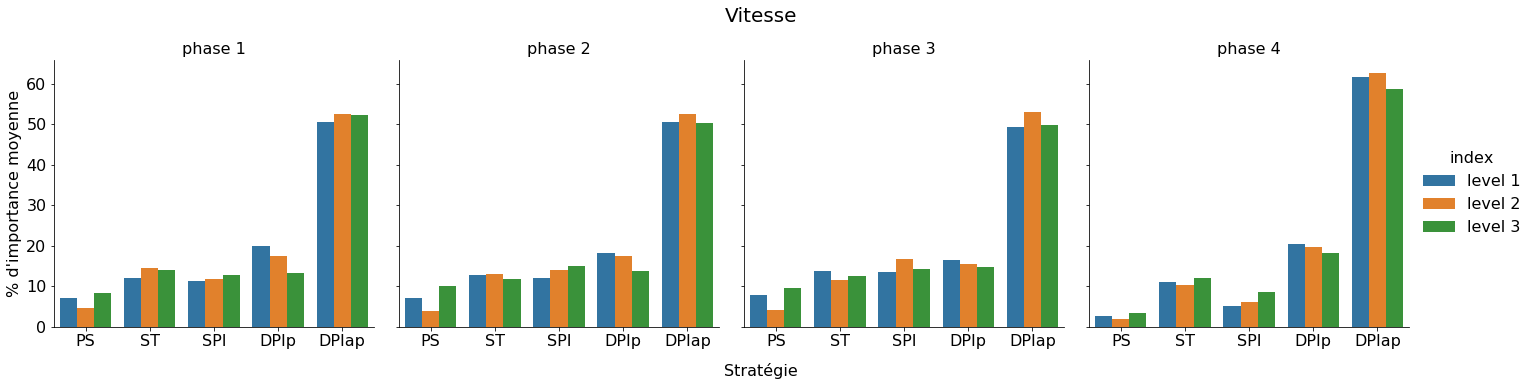

<Figure size 1152x720 with 0 Axes>

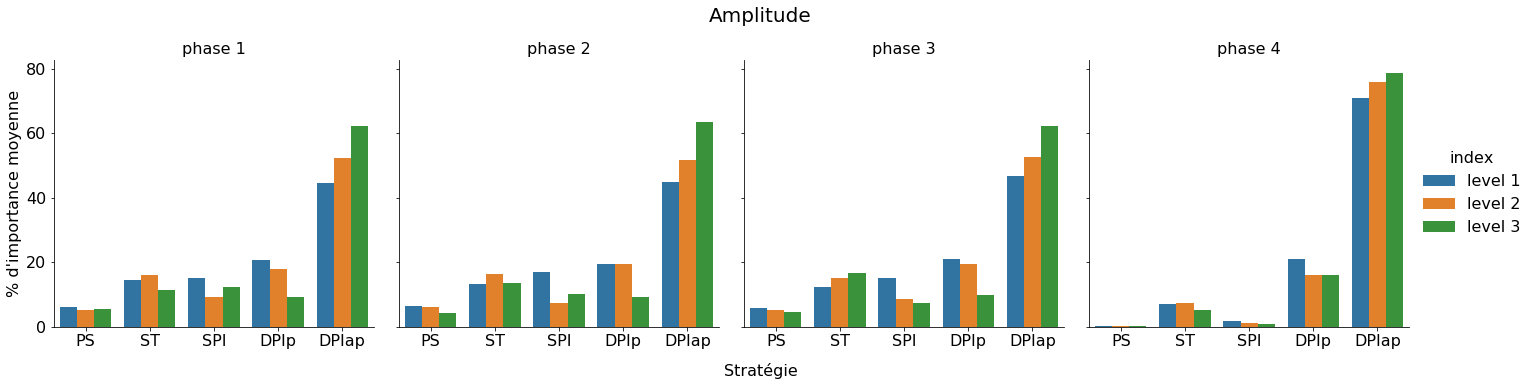

In [206]:
vit_data = plot_bar(v_sum_strat_df, 'Vitesse')
amp_data = plot_bar(a_sum_strat_df, 'Amplitude')

In [204]:
c1 = vit_data['index']=='level 1'
c2 = vit_data['phase'] == 'phase_1'
vit_data

,index,phase,strat,value
0,level 1,phase_1,PS,7.058219
1,level 2,phase_1,PS,4.622837
2,level 3,phase_1,PS,8.390411
3,level 1,phase_1,ST,12.089041
4,level 2,phase_1,ST,14.484429
5,level 3,phase_1,ST,14.044521
6,level 1,phase_1,SPI,11.304795
7,level 2,phase_1,SPI,11.830450
8,level 3,phase_1,SPI,12.876712
9,level 1,phase_1,DPIp,19.859589


In [95]:
def group_sum_data_for_anova(sum_strat_df, id_phase):
    strat_data_for_anova={'PS':None,'ST':None,'SPI':None,'DPIp':None,'DPIap':None}
    df_for_anova = pd.concat([sum_strat_df.loc[idx['lvl_0', : , :], :].groupby(level=1).mean(), sum_strat_df.loc[idx['lvl_1', : , :], :].groupby(level=1).mean(), sum_strat_df.loc[idx['lvl_2', : , :], :].groupby(level=1).mean()], keys=['lvl_0','lvl_1', 'lvl_2'])
    df_for_anova = df_for_anova['phase_{}'.format(id_phase)].reset_index()
    df_for_anova = pd.melt(df_for_anova, id_vars=['level_0', 'level_1'])
    df_for_anova.rename({'level_0':'level', 'level_1':'players'}, axis='columns', inplace = True)
    df_for_anova.set_index('players', inplace=True)
    
    for s in strat_data_for_anova.keys():
        strat_data_for_anova[s] = df_for_anova.groupby('strat').get_group(s).drop('strat', axis=1)

    return strat_data_for_anova
    
                             

In [53]:
v_sum = pd.concat([v_sum_strat_df.loc[idx['lvl_0', : , :], :].groupby(level=1).mean(), v_sum_strat_df.loc[idx['lvl_1', : , :], :].groupby(level=1).mean(), v_sum_strat_df.loc[idx['lvl_2', : , :], :].groupby(level=1).mean()], keys=['lvl_0','lvl_1', 'lvl_2'])

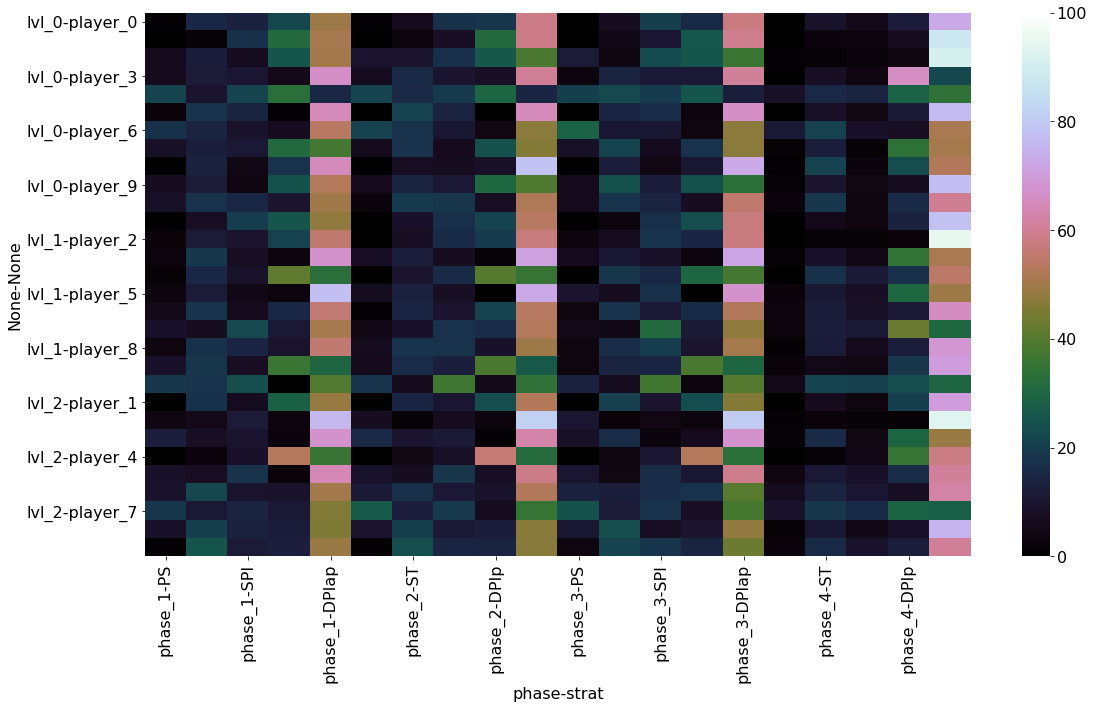

In [31]:
f = plt.figure()
sns.heatmap(v_sum, vmin=0, vmax=100, cmap='cubehelix')
f.set_size_inches(18.5,10)


g1 = v_sum_strat_df

In [158]:
g1_strat

DPIap      DPIp        PS       SPI        ST
lvl_0 player_3 move_0   0.878713  0.081683  0.000000  0.027228  0.012376
               move_1   0.712871  0.277228  0.000000  0.009901  0.000000
               move_10  0.725248  0.242574  0.000000  0.004950  0.027228
               move_11  0.764851  0.222772  0.000000  0.012376  0.000000
               move_12  0.195545  0.282178  0.089109  0.000000  0.433168
               move_13  0.858911  0.059406  0.000000  0.022277  0.059406
               move_14  0.784653  0.017327  0.039604  0.079208  0.079208
               move_15  0.178218  0.024752  0.101485  0.051980  0.643564
               move_16  0.000000  0.279703  0.653465  0.000000  0.066832
               move_17  0.915842  0.049505  0.000000  0.034653  0.000000
               move_18  0.735149  0.227723  0.000000  0.037129  0.000000
               move_19  0.930693  0.000000  0.044554  0.009901  0.014851
               move_2   0.876238  0.096535  0.000000  0.012376  0.014851
               move_20  0.754950  0.217822  0.000000  0.000000  0.027228
               move_21  0.792079  0.195545  0.000000  0.012376  0.000000
               move_22  0.787129  0.198020  0.000000  0.014851  0.000000
               move_23  0.242574  0.000000  0.448020  0.000000  0.309406
               move_24  0.814356  0.175743  0.000000  0.009901  0.000000
               move_25  0.782178  0.205446  0.000000  0.012376  0.000000
               move_26  0.784653  0.212871  0.000000  0.002475  0.000000
               move_27  0.202970  0.136139  0.000000  0.000000  0.660891
               move_28  0.782178  0.210396  0.000000  0.007426  0.000000
               move_29  0.787129  0.207921  0.000000  0.004950  0.000000
               move_3   0.358911  0.138614  0.264851  0.168317  0.069307
               move_4   0.851485  0.128713  0.000000  0.004950  0.014851
               move_5   0.195545  0.004950  0.750000  0.000000  0.049505
               move_6   0.693069  0.274752  0.000000  0.032178  0.000000
               move_7   0.700495  0.252475  0.000000  0.047030  0.000000
               move_8   0.542079  0.022277  0.081683  0.017327  0.336634
               move_9   0.856436  0.032178  0.000000  0.071782  0.039604
...                          ...       ...       ...       ...       ...
lvl_2 player_7 move_0   0.764851  0.227723  0.000000  0.007426  0.000000
               move_1   0.633663  0.257426  0.000000  0.047030  0.061881
               move_10  0.000000  0.925743  0.044554  0.029703  0.000000
               move_11  0.767327  0.217822  0.000000  0.002475  0.012376
               move_12  0.044554  0.945545  0.000000  0.007426  0.002475
               move_13  0.000000  0.000000  0.000000  0.000000  0.000000
               move_14  0.930693  0.019802  0.000000  0.029703  0.019802
               move_15  0.710396  0.158416  0.004950  0.017327  0.108911
               move_16  0.415842  0.000000  0.262376  0.000000  0.321782
               move_17  0.910891  0.034653  0.004950  0.000000  0.049505
               move_18  0.012376  0.212871  0.000000  0.004950  0.769802
               move_19  0.212871  0.433168  0.000000  0.000000  0.353960
               move_2   0.452970  0.207921  0.002475  0.000000  0.336634
               move_20  0.856436  0.113861  0.000000  0.002475  0.027228
               move_21  0.009901  0.193069  0.000000  0.002475  0.794554
               move_22  0.000000  0.000000  0.000000  0.000000  0.000000
               move_23  0.732673  0.217822  0.000000  0.002475  0.047030
               move_24  0.136139  0.232673  0.000000  0.002475  0.628713
               move_25  0.559406  0.235149  0.000000  0.205446  0.000000
               move_26  0.225248  0.009901  0.564356  0.000000  0.200495
               move_27  0.754950  0.240099  0.000000  0.004950  0.000000
               move_28  0.136139  0.457921  0.000000  0.084158  0.321782
               move_29  0.935644  0.009901  0.000000  0.009901  0.044554
            

In [161]:
p1 = group_sum_data_for_anova(a_sum_strat_df, 1)
p2 = group_sum_data_for_anova(a_sum_strat_df, 2)
p3 = group_sum_data_for_anova(a_sum_strat_df, 3)
p4 = group_sum_data_for_anova(a_sum_strat_df, 4)



,level,value
players,,
player_0,lvl_0,14.928571
player_1,lvl_0,1.586207
player_2,lvl_0,12.400000
player_3,lvl_0,11.933333
player_4,lvl_0,9.517241
player_5,lvl_0,18.066667
player_6,lvl_0,14.142857
player_7,lvl_0,12.800000
player_8,lvl_0,13.344828


In [70]:
def anova_one_way(df, var='value', show=True):
    results = ols("{} ~ C(level)".format(var), data=df).fit()    
    post_hoc= None
    
    if results.f_pvalue < 0.05:
        mc = MultiComparison(df[var], df['level'])
        post_hoc = mc.tukeyhsd()
    
    if show:
        print(results.summary())
        if post_hoc is not None:
            print(post_hoc)
        
        
    aov_table = anova_table(sm.stats.anova_lm(results, typ=2))
    
    return results, post_hoc, aov_table

def create_df_post_hoc(post_hoc, var):
    index_0 = [var]
    index_1 = ["comparaison 0", "comparaison 1", "comparaison 2"]
    index = pd.MultiIndex.from_product([index_0, index_1])
    columns = post_hoc.summary()[0]

    data = np.array(post_hoc.summary()[1:]) #shape 3,6
    
    df = pd.DataFrame(data, index=index, columns=columns)
    return df

def anova_table(aov):
    """from https://pythonfordatascience.org/anova-python/#test"""
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov



In [121]:
res, ph, tbl=anova_one_way(p1['DPIap'])


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.110
Date:                Fri, 28 Jun 2019   Prob (F-statistic):              0.141
Time:                        10:37:08   Log-Likelihood:                -129.82
No. Observations:                  30   AIC:                             265.6
Df Residuals:                      27   BIC:                             269.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.0465      6.11

In [107]:
tbl

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(level),71.241604,2.0,35.620802,0.087431,0.91654,0.006435,-0.064779
Residual,11000.182714,27.0,407.414175,NaN,NaN,NaN,NaN


In [108]:
p4['DPIap']

,level,value
players,,
player_0,lvl_0,72.964286
player_1,lvl_0,87.517241
player_2,lvl_0,90.833333
player_3,lvl_0,22.266667
player_4,lvl_0,34.206897
player_5,lvl_0,76.566667
player_6,lvl_0,51.535714
player_7,lvl_0,50.533333
player_8,lvl_0,52.344828
